### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

In [ ]:
from google.colab import drive
drive.mount('/c
ontent/drive')

Mounted at /content/drive


## Load Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Salinan online_retail_II.csv')

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## Section 1

### Create New Feature: Year

In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [ ]:
df['InvoiceYear']=pd.DatetimeIndex(df['InvoiceDate']).year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   InvoiceYear  1067371 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 73.3+ MB


In [ ]:
df.head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,2009
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,2009
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,2009
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,2009


### Filtering Data

In [ ]:
new_df = df[(~df.Invoice.str.contains('C')) & (df.Quantity > 0)]

In [ ]:
new_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044420 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044420 non-null  object        
 1   StockCode    1044420 non-null  object        
 2   Description  1042727 non-null  object        
 3   Quantity     1044420 non-null  int64         
 4   InvoiceDate  1044420 non-null  datetime64[ns]
 5   Price        1044420 non-null  float64       
 6   Customer ID  805620 non-null   float64       
 7   Country      1044420 non-null  object        
 8   InvoiceYear  1044420 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 79.7+ MB


### Create New Feature: Revenue

In [ ]:
new_df['Revenue']=new_df['Quantity']*new_df['Price']

### Average of Revenue per Year

In [ ]:
new_df.groupby('InvoiceYear')['Revenue'].mean().reset_index()

,InvoiceYear,Revenue
0,2009,18.713273
1,2010,19.908987
2,2011,20.058767


In [ ]:
revenue_df = new_df.groupby('InvoiceYear')['Revenue'].sum().reset_index()

In [ ]:
revenue_df

,InvoiceYear,Revenue
0,2009,8.256858e+05
1,2010,1.016740e+07
2,2011,9.820832e+06


In [ ]:
revenue_df['Revenue'].mean()

6937972.80933473

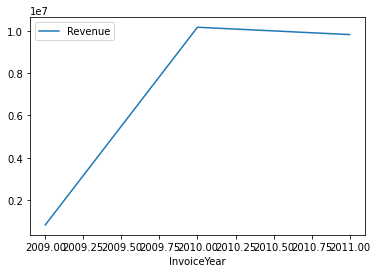

In [ ]:
revenue_df.plot(x = 'InvoiceYear', y = 'Revenue')

### Interpretation

Total penjualan pada tahun 2010 naik drastis, yaitu lebih dari 10 kali lipat dibanding tahun 2009, sedangkan pada tahun 2011, total penjualan turun sebesar 5,16% dibanding tahun 2010.

## Section 2

### Filtering Data 

In [ ]:
df['Customer ID'] = df['Customer ID'].fillna('-')

In [ ]:
clean_df=df

In [ ]:
clean_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009


#### Customers who finished their purchases

In [ ]:
finished_df = clean_df[~clean_df.Invoice.str.match('C')]

In [ ]:
finished_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011


#### Customers who canceled their purchases

In [ ]:
canceled_df = clean_df[clean_df.Invoice.str.match('C')]

In [ ]:
canceled_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year

Finished Transaction per Year

In [ ]:
finished_rate_df = finished_df.groupby('InvoiceYear')['Invoice'].count().reset_index()

Canceled Transaction per Year

In [ ]:
cancel_rate_df = canceled_df.groupby('InvoiceYear')['Invoice'].count().reset_index()

Total Transaction per Year

In [ ]:
rate_df = clean_df.groupby('InvoiceYear')['Invoice'].count().reset_index()

### Cancellation Rate

In [ ]:
rate_df['Canceled Invoice'] = cancel_rate_df['Invoice']

In [ ]:
rate_df['Canceled Rate(%)'] = cancel_rate_df['Invoice']/rate_df['Invoice']*100

Cancelation Rate and Finished Rate

In [ ]:
rate_df['Finished Invoice'] = finished_rate_df['Invoice']

In [ ]:
rate_df['Finished Rate(%)'] = finished_rate_df['Invoice']/rate_df['Invoice']*100

In [ ]:
rate_df

,InvoiceYear,Invoice,Canceled Invoice,Canceled Rate(%),Finished Invoice,Finished Rate(%)
0,2009,45228,1015,2.244185,44213,97.755815
1,2010,522714,9919,1.897596,512795,98.102404
2,2011,499429,8560,1.713957,490869,98.286043


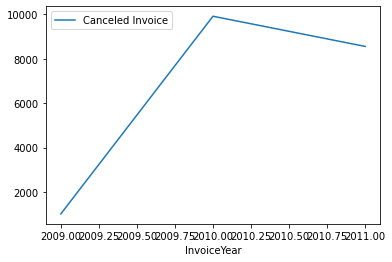

In [ ]:
rate_df.plot(x = 'InvoiceYear', y = 'Canceled Invoice')

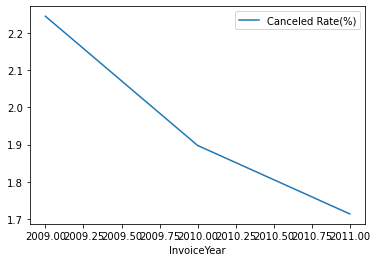

In [ ]:
rate_df.plot(x = 'InvoiceYear', y = 'Canceled Rate(%)')

### Interpretation

Total transaksi yang terjadi pada tahun 2010, naik secara signifikan, yaitu hampir 11 x lipat dibandingkan tahun sebelumnya. Namun pada tahun 2011, terjadi penurunan sekitar 4,45%. Meskipun pada tahun 2010 jumlah transaksi yang batal naik cukup signifikan, nilai %canceled rate turun. Hal ini diakibatkan oleh naik drastisnya jumlah transaksi yang terjadi secara keseluruhan. Secara umum, pada tiga tahun terakhir, total transaksi yang terjadi cenderung fluktuatif, namun nilai Canceled Rate terus menurun.